# EDA and feature engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../data/final_project/"
# sales
sales_train = pd.read_csv(DATA_DIR+"sales_train.csv")
sales_test = pd.read_csv(DATA_DIR+"test.csv")

# addional info
items = pd.read_csv(DATA_DIR+"items.csv")
item_categories = pd.read_csv(DATA_DIR+"item_categories.csv")
shops = pd.read_csv(DATA_DIR+"shops.csv")

## Data transformation

### Daily item count & price

,count,mean,std,min,0.1%,1%,50%,99%,99.9%,max
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,-1.0,1.0,1.0,5.0,22.0,2169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,0.1,5.0,399.0,5999.0,23990.0,307980.0


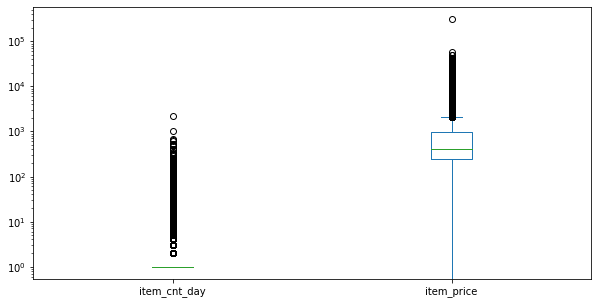

In [3]:
display(sales_train[["item_cnt_day","item_price"]].describe(percentiles=[0.001,0.01,0.990,0.999]).T);
fig, ax = plt.subplots(1,1,figsize=(10,5))
sales_train[["item_cnt_day","item_price"]].plot(kind="box",logy=True, ax=ax);

In [4]:
sales_train["item_cnt_day"] = sales_train["item_cnt_day"].clip(0,25)
sales_train["item_price"] = sales_train["item_price"].clip(0.1,25000)
sales_train["revenue"] = sales_train.item_cnt_day*sales_train.item_price

In [5]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


### Duplicated entities based on text representation

In [18]:
# categories
from itertools import product
from fuzzywuzzy import fuzz

cat_pairs = pd.DataFrame(list(product(shops.shop_id.unique(),shops.shop_id.unique())),
    columns=["from","to"])
cat_pairs = cat_pairs[cat_pairs["from"]<cat_pairs["to"]]
cat_pairs["tf"] = item_categories.item_category_name[cat_pairs["from"]].values
cat_pairs["tt"] = item_categories.item_category_name[cat_pairs["to"]].values
cat_pairs["similarity"] = cat_pairs.apply(lambda x: fuzz.ratio(x["tf"],x["tt"]), axis=1)
cat_pairs.sort_values("similarity").tail(10)

,from,to,tf,tt,similarity
124,2,4,Аксессуары - PS3,Аксессуары - PSP,94
123,2,3,Аксессуары - PS3,Аксессуары - PS4,94
184,3,4,Аксессуары - PS4,Аксессуары - PSP,94
63,1,3,Аксессуары - PS2,Аксессуары - PS4,94
673,11,13,Игровые консоли - PS3,Игровые консоли - PSP,95
733,12,13,Игровые консоли - PS4,Игровые консоли - PSP,95
613,10,13,Игровые консоли - PS2,Игровые консоли - PSP,95
672,11,12,Игровые консоли - PS3,Игровые консоли - PS4,95
611,10,11,Игровые консоли - PS2,Игровые консоли - PS3,95
612,10,12,Игровые консоли - PS2,Игровые консоли - PS4,95


In [19]:
# shops
shop_pairs = pd.DataFrame(list(product(shops.shop_id.unique(),shops.shop_id.unique())),
    columns=["from","to"])
shop_pairs = shop_pairs[shop_pairs["from"]<shop_pairs["to"]]
shop_pairs["tf"] = shops.shop_name[shop_pairs["from"]].values
shop_pairs["tt"] = shops.shop_name[shop_pairs["to"]].values
shop_pairs["similarity"] = shop_pairs.apply(lambda x: fuzz.ratio(x["tf"],x["tt"]), axis=1)
shop_pairs.sort_values("similarity").tail(10)

,from,to,tf,tt,similarity
3178,52,58,"Уфа ТК ""Центральный""","Якутск ТЦ ""Центральный""",74
885,14,45,"Казань ТЦ ""ПаркХаус"" II","Самара ТЦ ""ПаркХаус""",74
1648,27,28,"Москва ТЦ ""МЕГА Белая Дача II""","Москва ТЦ ""МЕГА Теплый Стан"" II",75
2334,38,54,"Омск ТЦ ""Мега""","Химки ТЦ ""Мега""",83
1831,30,31,"Москва ТЦ ""Перловский""","Москва ТЦ ""Семеновский""",84
57,0,57,"!Якутск Орджоникидзе, 56 фран","Якутск Орджоникидзе, 56",88
118,1,58,"!Якутск ТЦ ""Центральный"" фран","Якутск ТЦ ""Центральный""",88
2380,39,40,"РостовНаДону ТРК ""Мегацентр Горизонт""","РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",88
1404,23,24,"Москва ТК ""Буденовский"" (пав.А2)","Москва ТК ""Буденовский"" (пав.К7)",94
611,10,11,Жуковский ул. Чкалова 39м?,Жуковский ул. Чкалова 39м²,96


In [20]:
#item_pairs = pd.DataFrame([t for t in product(items.item_id.unique(),items.item_id.unique()) if t[0]<t[1]],
#    columns=["from","to"])

item_pairs = items.merge(items, on="item_category_id", suffixes=["_from","_to"])
item_pairs = item_pairs[item_pairs.item_name_from<item_pairs.item_name_to]
item_pairs["similarity"] = item_pairs.apply(\
    lambda x: fuzz.ratio(x["item_name_from"],x["item_name_to"]), axis=1)
item_pairs.sort_values("similarity").tail(10)

,item_name_from,item_id_from,item_category_id,item_name_to,item_id_to,similarity
39763273,Порхающие маленькие наклейки бабочки 1,17680,66,Порхающие маленькие наклейки бабочки 10,17681,99
36043295,1С:Предприятие 8.2. Практическое пособие разра...,804,49,1С:Предприятие 8.3. Практическое пособие разра...,806,99
35966494,1С:Образовательная коллекция. Полезные уроки. ...,622,78,1С:Образовательная коллекция. Полезные уроки. ...,623,99
35967331,1С:Образовательная коллекция. Полезные уроки. ...,627,78,1С:Образовательная коллекция. Полезные уроки. ...,629,99
35967332,1С:Образовательная коллекция. Полезные уроки. ...,627,78,1С:Образовательная коллекция. Полезные уроки. ...,630,99
35967333,1С:Образовательная коллекция. Полезные уроки. ...,627,78,1С:Образовательная коллекция. Полезные уроки. ...,632,99
35967334,1С:Образовательная коллекция. Полезные уроки. ...,627,78,1С:Образовательная коллекция. Полезные уроки. ...,633,99
31113838,"Call of Duty: Black Ops II [PS3, русская версия]",2307,19,"Call of Duty: Black Ops III [PS3, русская версия]",2322,99
40092872,Футболка Worms Taste my Bazooka зеленая L,21311,61,Футболка Worms Taste my Bazooka зеленая XL,21314,99
40053337,Футболка The Elder Scrolls Online Nord L,21245,61,Футболка The Elder Scrolls Online Nord XL,21247,99


In [24]:
# expand the dataset
shop_item_month = product(sales_train.shop_id.unique(), sales_train.item_id.unique(), sales_train.date_block_num.unique())
sales_index=pd.DataFrame(list(shop_item_month), columns=["shop_id","item_id","date_block_num"])

In [25]:
agg_sales_train = sales_train.groupby(["shop_id", "item_id", "date_block_num"], as_index=False).agg(
    total_sold=("item_cnt_day", sum), avg_price=("item_price",np.mean),
    sum_revenue=("revenue",sum), n_transactions = ("item_cnt_day",pd.Series.count)).sort_values("date_block_num")
agg_sales_train = sales_index.merge(agg_sales_train, on=["shop_id", "item_id", "date_block_num"], how="left").fillna(0)    
agg_sales_train.head()    

,shop_id,item_id,date_block_num,total_sold,avg_price,sum_revenue,n_transactions
0,59,22154,0,1.0,999.0,999.0,1.0
1,59,22154,1,0.0,0.0,0.0,0.0
2,59,22154,2,0.0,0.0,0.0,0.0
3,59,22154,3,0.0,0.0,0.0,0.0
4,59,22154,4,0.0,0.0,0.0,0.0


In [26]:
# target transformation
agg_sales_train["total_sold"] = agg_sales_train["total_sold"].\
        groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).shift(-1).\
            fillna(0).clip(0,20)

In [27]:
# lags on item-shop-month
lags = [1,2,3,6,12]
for l in lags:
    agg_sales_train["lag"+str(l)+"_total_sold"]=agg_sales_train["total_sold"].\
        groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).shift(l)
agg_sales_train.fillna(0, inplace=True)

# rolling window
#win = [3,6]
#for w in win:
#    agg_sales_train["lag_win_"+str(w)]=agg_sales_train["cnt_item"].\
#        groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).shift(1).rolling(w).mean()
#agg_sales_train.fillna(0, inplace=True)

# cumsum on item-shop-month
agg_sales_train["cumsum_cnt_item"] = agg_sales_train["total_sold"].\
    groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).cumsum()

# price change on item-shop-month
agg_sales_train["price_increase"]=agg_sales_train["avg_price"]/\
    agg_sales_train["avg_price"].groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).\
        shift(1).fillna(1).clip(0,10)

In [ ]:
# item-month

In [ ]:
# shop-month

In [ ]:
# category-month

In [28]:
from lightgbm import LGBMRegressor

target = "total_sold"
features = [c!=target for c in agg_sales_train.columns]
# tree bench
gbm = LGBMRegressor()
gbm.fit(agg_sales_train.loc[:,features],agg_sales_train.loc[:,target])
# train rsme
np.mean((gbm.predict(agg_sales_train.loc[:,features])-agg_sales_train.loc[:,target])**2)**(1/2)

0.36053669697707885